In [ ]:
import pandas as pd
import copy
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars_data =pd.read_excel('https://github.com/tleitch/BDML/blob/main/Car%20Pricing%20with%20NN/Cars_Data_full.xlsx?raw=true')  
NN_data=copy.deepcopy(cars_data)
cars_data.head()

,Price,Age,KM,Fuel,HP,MC,Color,Auto,CC,Drs,Cyl,Grs,Wght,G_P,Mfr_G,ABS,Abag_1,Abag_2,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar
0,21000,26,31463,Petrol,195,0,Silver,0,1800,3,3,6,1189,10,1,1,1,1,1,0,1,1,1,1,0,0,1,0
1,20000,23,43612,Petrol,195,0,Red,0,1800,3,3,6,1189,4,1,1,1,1,1,1,0,1,1,1,0,1,1,0
2,19650,26,32191,Petrol,195,0,Red,0,1800,3,3,6,1189,4,1,1,1,1,1,1,0,1,1,1,0,1,1,0
3,21550,32,23002,Petrol,195,1,Black,0,1800,3,3,6,1189,4,1,1,1,1,1,1,1,1,1,1,0,1,1,0
4,22550,33,34133,Petrol,195,1,Grey,0,1800,3,3,6,1189,4,1,1,1,1,1,1,1,1,1,1,0,1,1,0


In [ ]:
Sample_Size = cars_data.shape[0]
Num_features = cars_data.shape[1]

In [ ]:
NN_data.columns

Index(['Price', 'Age', 'KM', 'Fuel', 'HP', 'MC', 'Color', 'Auto', 'CC', 'Drs',
       'Cyl', 'Grs', 'Wght', 'G_P', 'Mfr_G', 'ABS', 'Abag_1', 'Abag_2', 'AC',
       'Comp', 'CD', 'Clock', 'Pwin', 'PStr', 'Radio', 'SpM', 'M_Rim',
       'Tow_Bar'],
      dtype='object')

In [ ]:
NN_data.drop(["Cyl"],axis=1,inplace=True)

In [ ]:
NN_data["Color"] = NN_data["Color"].astype("category")
NN_data["Grs"] = NN_data["Grs"].astype("category")
NN_data["Drs"] = NN_data["Drs"].astype("category")
NN_data = pd.get_dummies(NN_data)

In [ ]:
NN_data.head()

,Price,Age,KM,HP,MC,Auto,CC,Wght,G_P,Mfr_G,ABS,Abag_1,Abag_2,AC,Comp,CD,Clock,Pwin,PStr,Radio,SpM,M_Rim,Tow_Bar,Fuel_Diesel,Fuel_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_White,Color_Yellow,Drs_2,Drs_3,Drs_4,Drs_5,Grs_3,Grs_4,Grs_5,Grs_6
0,21000,26,31463,195,0,0,1800,1189,10,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,20000,23,43612,195,0,0,1800,1189,4,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,19650,26,32191,195,0,0,1800,1189,4,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,21550,32,23002,195,1,0,1800,1189,4,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,22550,33,34133,195,1,0,1800,1189,4,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
NN_data.columns

Index(['Price', 'Age', 'KM', 'HP', 'MC', 'Auto', 'CC', 'Wght', 'G_P', 'Mfr_G',
       'ABS', 'Abag_1', 'Abag_2', 'AC', 'Comp', 'CD', 'Clock', 'Pwin', 'PStr',
       'Radio', 'SpM', 'M_Rim', 'Tow_Bar', 'Fuel_Diesel', 'Fuel_Petrol',
       'Color_Black', 'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red',
       'Color_Silver', 'Color_White', 'Color_Yellow', 'Drs_2', 'Drs_3',
       'Drs_4', 'Drs_5', 'Grs_3', 'Grs_4', 'Grs_5', 'Grs_6'],
      dtype='object')

In [ ]:
feature_columns = NN_data.columns[1:]
target_column = NN_data.columns[0]
print(feature_columns)

Index(['Age', 'KM', 'HP', 'MC', 'Auto', 'CC', 'Wght', 'G_P', 'Mfr_G', 'ABS',
       'Abag_1', 'Abag_2', 'AC', 'Comp', 'CD', 'Clock', 'Pwin', 'PStr',
       'Radio', 'SpM', 'M_Rim', 'Tow_Bar', 'Fuel_Diesel', 'Fuel_Petrol',
       'Color_Black', 'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red',
       'Color_Silver', 'Color_White', 'Color_Yellow', 'Drs_2', 'Drs_3',
       'Drs_4', 'Drs_5', 'Grs_3', 'Grs_4', 'Grs_5', 'Grs_6'],
      dtype='object')


In [ ]:
X_train = NN_data[feature_columns]
Y_train = NN_data[target_column]
randomf = RandomForestRegressor(n_estimators=1000, max_depth=7, oob_score=True).fit(X_train, Y_train)

In [ ]:
feature_importances = pd.DataFrame(randomf.feature_importances_,
                                   index = feature_columns,
                                    columns=['importance']).sort_values('importance', ascending=False).reset_index().rename(columns={'index':'feature'})
feature_importances.head(10)

,feature,importance
0,Age,0.867781
1,Wght,0.061349
2,KM,0.030887
3,HP,0.009866
4,CC,0.004805
5,M_Rim,0.004201
6,Pwin,0.003115
7,AC,0.002325
8,Clock,0.002101
9,Mfr_G,0.001767


In [ ]:
new_columns = feature_importances["feature"].iloc[0:10]
NN_data_new = copy.deepcopy(NN_data)
NN_data_new = NN_data_new[new_columns]
NN_data_new["Price"] = NN_data["Price"]

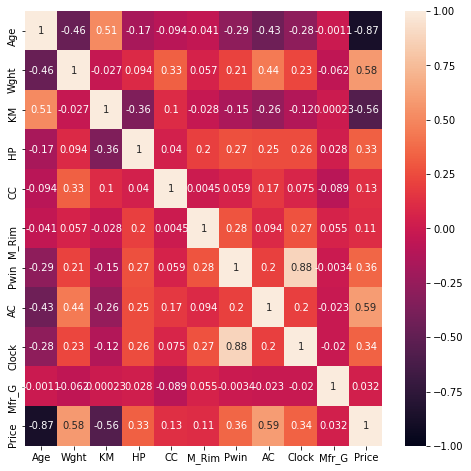

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(NN_data_new.corr(),vmin=-1, vmax=1,annot=True)

In [ ]:
def find_high_correlated_features(frame):
    new_corr = frame.corr()
    new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
    new_corr = new_corr.stack()
    print(new_corr[(new_corr > 0.80) | (new_corr < -0.80)])
  
    
predictor = list(set(NN_data_new.columns.values))
find_high_correlated_features(NN_data_new[predictor])

Clock  Pwin     0.878686
Age    Price   -0.874000
dtype: float64


In [ ]:
NN_data_new.drop(["Clock"],axis=1,inplace=True)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(NN_data_new)
NN_data_scaled = copy.deepcopy(NN_data_new)
NN_data_scaled = scaler.transform(NN_data_scaled)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(
    NN_data_scaled[:,1:9], NN_data_scaled[:,0], test_size=0.6, random_state=42)
training_size = len(y_validation)

In [ ]:
def training_and_valuation(model):
    
    model.fit(X_train, y_train)
    
    print('Coefficient of determination score on training set  is {0:0.2%}'.format(model.score(X_train, y_train)))
    print('Coefficient of determination score  on validation set  is {0:0.2%}'.format(model.score(X_validation, y_validation)))
    
    predicted_price_train = model.predict(X_train)
    predicted_price_validation =  model.predict(X_validation)
    print ("mean squared error  in training data using scaled values: " + str(mean_squared_error(y_train,predicted_price_train)))
    print ("mean squared error  in validation data using scaled values: " + str(mean_squared_error(y_validation,predicted_price_validation)))
    
    #validation_copy=copy.deepcopy(validationset)
    #validation_copy[:,9] = predicted_price_validation
    #validation_copy[:,9] = pd.concat(X_validation,predicted_price_validation)
    #validation_actual_values = scaler.inverse_transform(validation_copy)
    
    
    #y_true = validation_actual_values[:,9]
    #y_pred = NN_data_new[training_size:Sample_Size]["Price"].values
    #print ("mean absolute percentage error in validation data after invering the scaling operation: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100))
    #print ("         ")
    #print ("distribution of predicted price values of validation set after inversing the scaling operation ")
    #print (pd.DataFrame(validation_actual_values[:,9]).describe())
    print ("         ")
    print ("distribution of true price values of validation set: ")
    print (NN_data_new[training_size:Sample_Size]["Price"].describe())
    

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(3,3),random_state=1, max_iter=500)
training_and_valuation(model)

Coefficient of determination score on training set  is -12.90%
Coefficient of determination score  on validation set  is -9.53%
mean squared error  in training data using scaled values: 0.06368637099935527
mean squared error  in validation data using scaled values: 0.06152466552901417
         
distribution of true price values of validation set: 
count      546.000000
mean      8509.227106
std       1293.493042
min       4450.000000
25%       7550.000000
50%       8547.500000
75%       9300.000000
max      13000.000000
Name: Price, dtype: float64


In [ ]:
model = MLPRegressor(hidden_layer_sizes=(1000),random_state=5, max_iter=500)
training_and_valuation(model)

Coefficient of determination score on training set  is 56.47%
Coefficient of determination score  on validation set  is 53.64%
mean squared error  in training data using scaled values: 0.024555516018189304
mean squared error  in validation data using scaled values: 0.026042345397973263
         
distribution of true price values of validation set: 
count      546.000000
mean      8509.227106
std       1293.493042
min       4450.000000
25%       7550.000000
50%       8547.500000
75%       9300.000000
max      13000.000000
Name: Price, dtype: float64


In [ ]:
linear_reg = LinearRegression()
training_and_valuation(linear_reg)

Coefficient of determination score on training set  is 49.26%
Coefficient of determination score  on validation set  is 48.28%
mean squared error  in training data using scaled values: 0.028621224599547048
mean squared error  in validation data using scaled values: 0.02904904776549003
         
distribution of true price values of validation set: 
count      546.000000
mean      8509.227106
std       1293.493042
min       4450.000000
25%       7550.000000
50%       8547.500000
75%       9300.000000
max      13000.000000
Name: Price, dtype: float64
